<a href="https://colab.research.google.com/github/dcm5455/Data-Science-Internship-Task/blob/main/Exploratory_Data_Analysis_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LETS GROW MORE**
  Task 1:- Exploratory Data Analysis - Global Terrorism  (Inetrmediate Task)
           
           
           
Author:- Dhruvil Patel

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

plt.style.use('bmh')


Loading the Dataset

In [ ]:
data = pd.read_csv("globalterrorism.csv",encoding='latin1')
data.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [ ]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [ ]:
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [ ]:
data.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [ ]:
data.shape

(181691, 18)

In [ ]:
data.isnull()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
181687,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
181688,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
181689,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
data.isnull().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

In [ ]:
data['Casualities'] = data['kill'] + data['Wound']
data['Wound'] = data['Wound'].fillna(0)
data['kill'] = data['kill'].fillna(0)
data.describe()

,Year,Month,day,latitude,longitude,kill,Wound,Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,164817.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.296128
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,42.069023
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   Attacktype   181691 non-null  object 
 10  kill         181691 non-null  float64
 11  Wound        181691 non-null  float64
 12  target1      181055 non-null  object 
 13  summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Targettype   181691 non-null  object 
 16  Weapon       181691 non-null  object 
 17  motive       50561 non-null   object 
 18  Casualities  164817 non-

In [ ]:
list(set(data.dtypes.tolist()))
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.head()

,Year,Month,day,latitude,longitude,kill,Wound,Casualities
0,1970,7,2,18.456792,-69.951164,1.0,0.0,1.0
1,1970,0,0,19.371887,-99.086624,0.0,0.0,0.0
2,1970,1,0,15.478598,120.599741,1.0,0.0,1.0
3,1970,1,0,37.997490,23.762728,0.0,0.0,NaN
4,1970,1,0,33.580412,130.396361,0.0,0.0,NaN


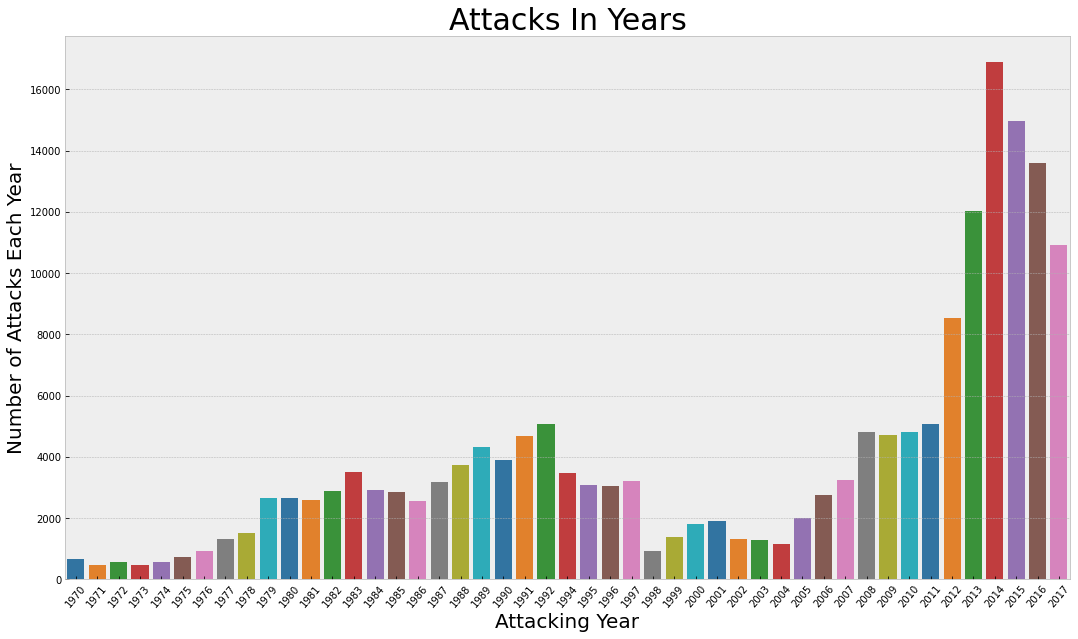

In [ ]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()

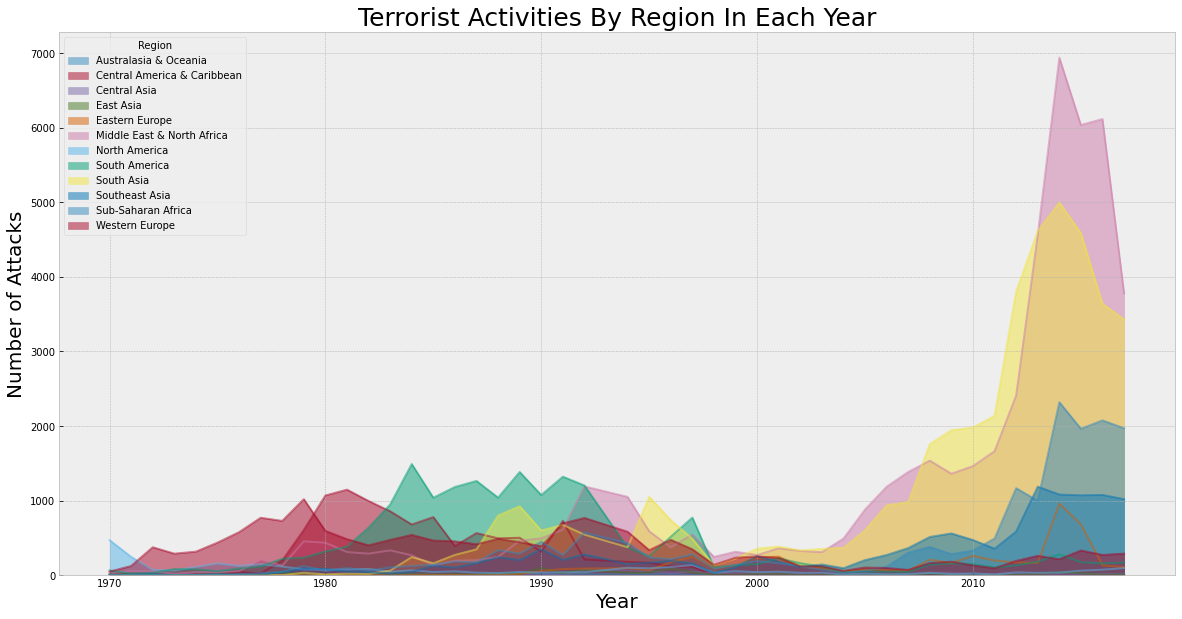

In [ ]:
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

Hot Zone Of Terrorism With Respect to City & Country

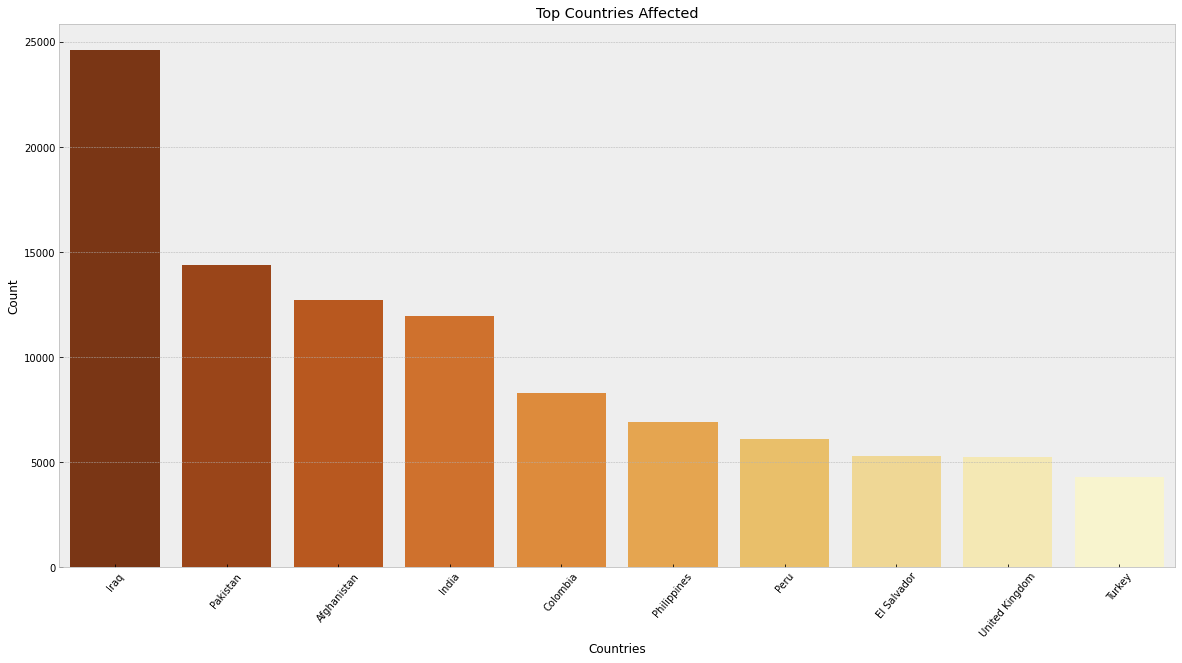

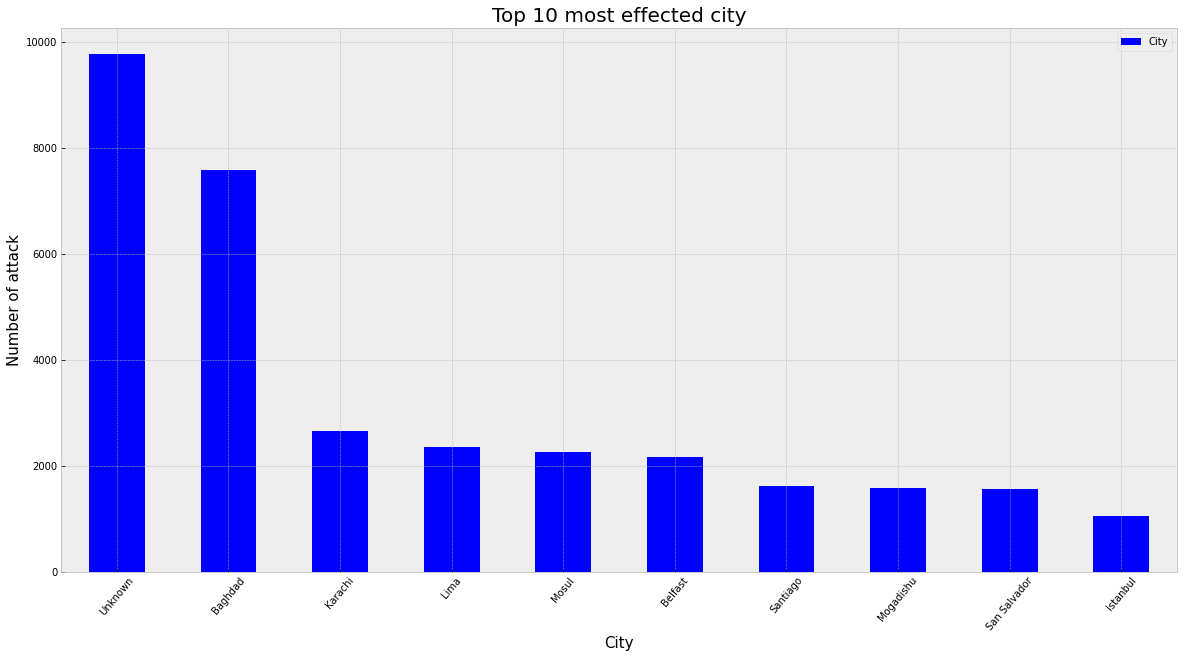

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette='YlOrBr_r')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()
data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()